In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline


In [132]:
#pull in data containing Vaccine data, covid cases, demographic information, and cultural dimensions
df = pd.read_csv("Cleaned COVID Data.csv")


In [133]:
#get % of population vaccinated
df['% population vaccinated'] = (df['Total People Vaccinated']/df['population'])*100
#get % of population that has tested positive
df['% of population with covid'] = (df['total_cases']/df['population'])*100
#group by location and find countries with highest vaccation rates (at least 1 dose)
grouped_df = df.groupby("location")
df["total % population vaccinated"] = grouped_df[["% population vaccinated"]].transform(max)
df["total % of population with covid"] = grouped_df[["% of population with covid"]].transform(max)


In [134]:
#create dataset with "location", "max % population vaccinated",'human_development_index','GDP per capita (current US$)','Services, value added (% of GDP)','pdi_x','idv_x','mas_x','uai_x','ltowvs_x','ivr_x'
df2 = df[['location', 'total % population vaccinated','total % of population with covid','human_development_index','GDP per capita (current US$)','Services, value added (% of GDP)','population_density','handwashing_facilities','pdi_x','idv_x','mas_x','uai_x','ltowvs_x','ivr_x', 'continent']]
df2=df2.drop_duplicates(subset=['location'])


In [135]:
df2.head(20)


,location,total % population vaccinated,total % of population with covid,human_development_index,GDP per capita (current US$),"Services, value added (% of GDP)",population_density,handwashing_facilities,pdi_x,idv_x,mas_x,uai_x,ltowvs_x,ivr_x,continent
0,Algeria,0.000068,0.252888,0.748,3973.964072,46.233901,17.348,83.741,57.0,50.0,47.0,74.5,26.0,32.0,Africa
51,Egypt,0.000000,0.160534,0.707,NaN,NaN,97.999,89.827,NaN,NaN,NaN,NaN,NaN,NaN,Africa
101,Mauritius,0.016277,0.046707,0.804,11099.240284,67.650252,622.962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
148,Morocco,8.562534,1.307252,0.686,3204.095003,50.925841,80.080,NaN,70.0,46.0,53.0,68.0,14.0,25.0,Africa
203,Rwanda,0.000000,0.144292,0.543,820.025242,49.092144,494.869,4.617,NaN,NaN,NaN,NaN,18.0,37.0,Africa
253,Senegal,0.312728,0.210506,0.512,1446.830965,51.444273,82.328,20.859,NaN,NaN,NaN,NaN,NaN,NaN,Africa
306,Seychelles,58.058776,2.999797,0.796,17448.270293,72.272076,208.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
357,South Africa,0.088768,2.544524,0.709,6001.400814,61.204745,46.754,43.993,NaN,NaN,NaN,NaN,34.0,63.0,Africa
412,Zimbabwe,0.074057,0.242173,0.571,1463.985910,61.279369,42.729,36.791,NaN,NaN,NaN,NaN,15.0,28.0,Africa
461,Azerbaijan,0.641078,2.310513,0.756,4793.587020,37.360463,119.309,83.241,53.5,60.0,43.0,72.0,61.0,22.0,Asia


In [136]:
df2.isna().sum()


location                             0
total % population vaccinated        0
total % of population with covid     0
human_development_index             15
GDP per capita (current US$)        17
Services, value added (% of GDP)    19
population_density                   5
handwashing_facilities              85
pdi_x                               48
idv_x                               48
mas_x                               48
uai_x                               48
ltowvs_x                            45
ivr_x                               45
continent                            0
dtype: int64

In [137]:
# remove na from human_development_index
df2 = df2[-df2['human_development_index'].isna()]

In [138]:
df2.isna().sum()

location                             0
total % population vaccinated        0
total % of population with covid     0
human_development_index              0
GDP per capita (current US$)         9
Services, value added (% of GDP)    10
population_density                   0
handwashing_facilities              70
pdi_x                               33
idv_x                               33
mas_x                               33
uai_x                               33
ltowvs_x                            30
ivr_x                               30
continent                            0
dtype: int64

In [139]:
df2.shape

(100, 15)

Text(0.5, 1, 'Scatter Plot - Human Dev index and Vaccination Rates')

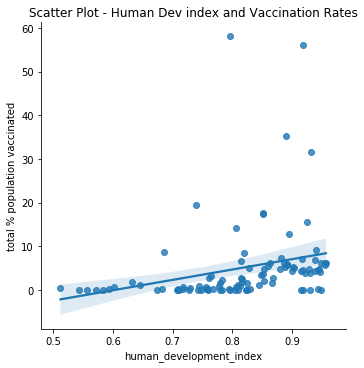

In [140]:
#Plot human development index against population vaccinated
sns.lmplot(x='human_development_index',y='total % population vaccinated',data=df2,fit_reg=True)
plt.title("Scatter Plot - Human Dev index and Vaccination Rates")


Text(0.5, 1.0, 'Residual Plot - Human Dev index and Vaccination Rates')

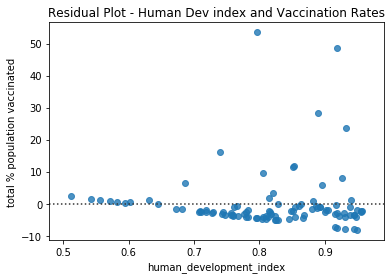

In [141]:
#plot residual plot
sns.residplot(x='human_development_index',y='total % population vaccinated',data=df2)
plt.title("Residual Plot - Human Dev index and Vaccination Rates")


In [142]:
#sort by total percentage of population vaccinated
df2 = df2.sort_values("total % population vaccinated", ascending=False)
df2.filter(items=['location','total % population vaccinated','human_development_index','GDP per capita (current US$)']).head(10)


,location,total % population vaccinated,human_development_index,GDP per capita (current US$)
306,Seychelles,58.058776,0.796,17448.270293
902,Israel,56.178152,0.919,43592.083582
1857,United Arab Emirates,35.189831,0.890,43103.323058
4072,United Kingdom,31.462767,0.932,42330.117537
1277,Maldives,19.353168,0.740,10626.513402
513,Bahrain,17.523153,0.852,23503.977127
5008,Chile,17.311482,0.851,14896.453867
4676,United States,15.635962,0.926,65297.517508
3690,Serbia,14.270561,0.806,7411.836116
3168,Malta,12.801814,0.895,29820.603247


In [144]:
# asign predictor and response variable for SLR model
x=df2["human_development_index"]
y= df2["total % population vaccinated"]
x = sm.add_constant(x)


In [145]:
# run SLR model for human development index against % of population vaccinated
model = sm.OLS(y, x)
results = sm.OLS(y,x).fit()
print(results.summary())


                                  OLS Regression Results                                 
Dep. Variable:     total % population vaccinated   R-squared:                       0.069
Model:                                       OLS   Adj. R-squared:                  0.060
Method:                            Least Squares   F-statistic:                     7.300
Date:                           Sat, 24 Apr 2021   Prob (F-statistic):            0.00813
Time:                                   12:22:28   Log-Likelihood:                -363.24
No. Observations:                            100   AIC:                             730.5
Df Residuals:                                 98   BIC:                             735.7
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

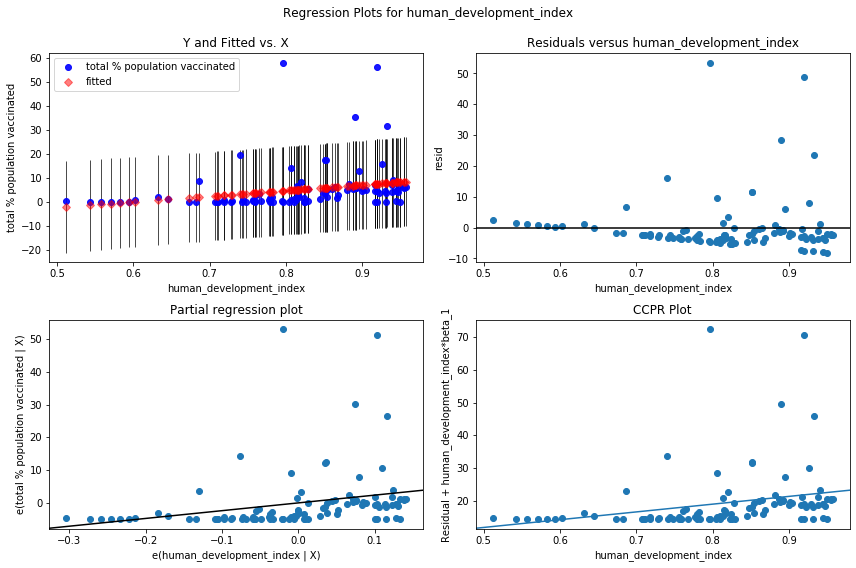

In [153]:
#regression plots for the SLR model
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'human_development_index', fig=fig)

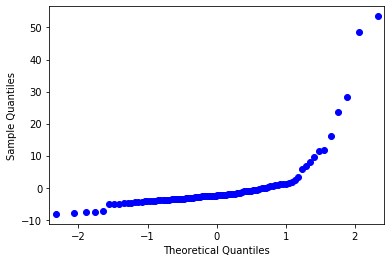

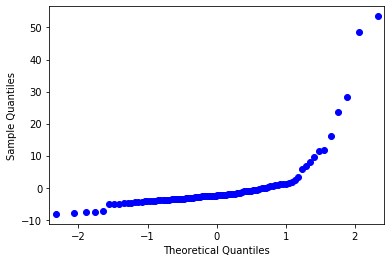

In [160]:
#QQ plot for the SLR model
res = results.resid # residuals
sm.qqplot(res)


In [147]:
#new dataframe remove NaN for Hofstede Data
df3=df2[-df2['mas_x'].isna()]

In [148]:
df3.isna().sum()

location                             0
total % population vaccinated        0
total % of population with covid     0
human_development_index              0
GDP per capita (current US$)         0
Services, value added (% of GDP)     1
population_density                   0
handwashing_facilities              53
pdi_x                                0
idv_x                                0
mas_x                                0
uai_x                                0
ltowvs_x                             0
ivr_x                                0
continent                            0
dtype: int64

In [187]:
#data with just USA and Singapore for IDV and UAI barplot
array = ['United States', 'Singapore']
df_3=df3.loc[df3['location'].isin(array)]
df_3.head()

,location,total % population vaccinated,total % of population with covid,human_development_index,GDP per capita (current US$),"Services, value added (% of GDP)",population_density,handwashing_facilities,pdi_x,idv_x,mas_x,uai_x,ltowvs_x,ivr_x,continent
4676,United States,15.635962,8.668813,0.926,65297.517508,76.890403,35.608,NaN,40.0,91.0,62.0,46.0,26.0,68.0,North America
1634,Singapore,4.273254,1.023701,0.938,65233.282439,70.375558,7915.731,NaN,74.0,20.0,48.0,8.0,72.0,46.0,Asia


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Uncertainty Avoidance: USA vs. Singapore')

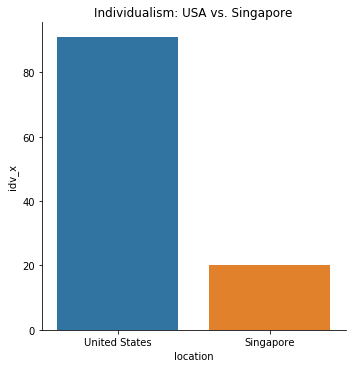

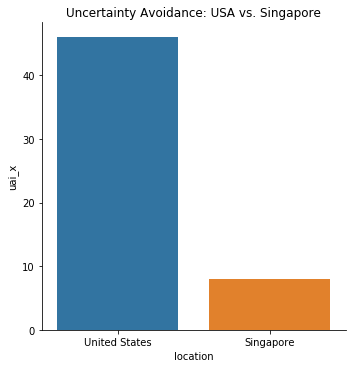

In [188]:
#bar plot comparing IDV and UAI between USA and Singapore
sns.factorplot(x='location', y='idv_x', data=df_3, kind='bar')
plt.title('Individualism: USA vs. Singapore')

sns.factorplot(x='location', y='uai_x', data=df_3, kind='bar')
plt.title('Uncertainty Avoidance: USA vs. Singapore')



In [149]:
df3.shape

(67, 15)

In [150]:
# MLR individualism and uncertainty avoidance against % of population tested positive for Covid
x4 = df3[['idv_x','uai_x']]
x4 = sm.add_constant(x4)
y4 = df3['total % of population with covid']
model4 = sm.OLS(y4,x4).fit()
print(model4.summary())

                                   OLS Regression Results                                   
Dep. Variable:     total % of population with covid   R-squared:                       0.139
Model:                                          OLS   Adj. R-squared:                  0.112
Method:                               Least Squares   F-statistic:                     5.166
Date:                              Sat, 24 Apr 2021   Prob (F-statistic):            0.00832
Time:                                      12:23:39   Log-Likelihood:                -163.47
No. Observations:                                67   AIC:                             332.9
Df Residuals:                                    64   BIC:                             339.6
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

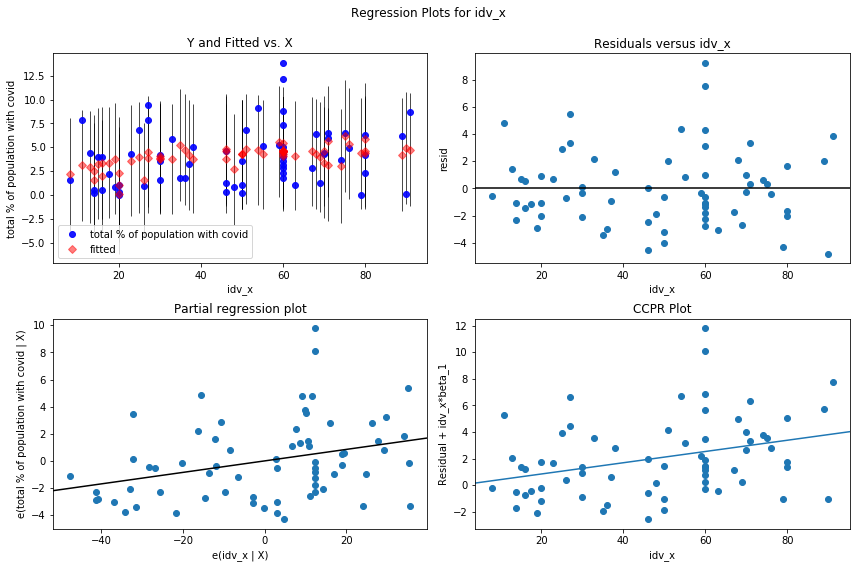

In [151]:
#Regression plots for the MLR model - IDV
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model4, 'idv_x', fig=fig)

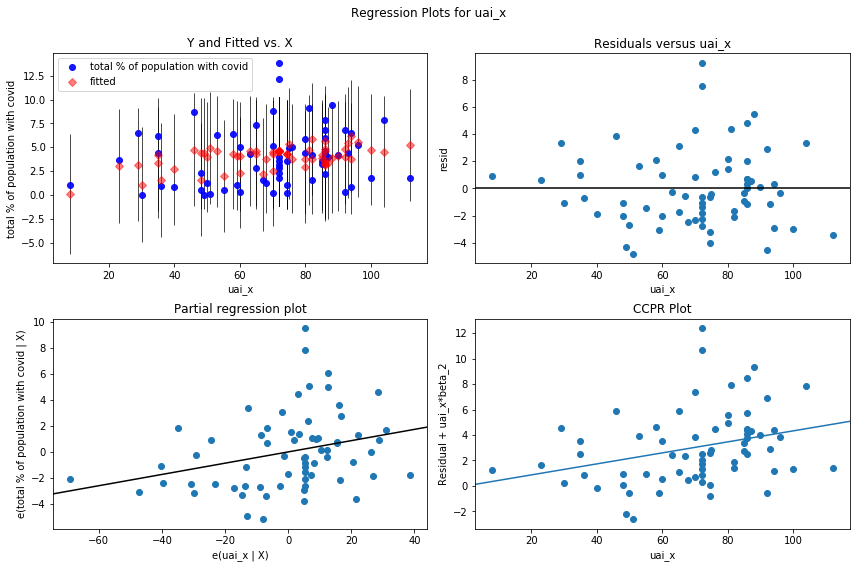

In [152]:
#Regression plots for the MLR model - UAI
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model4, 'uai_x', fig=fig)

In [29]:
df.head()

,continent,location,population,population_density,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,life_expectancy,...,uai_x,ltowvs_x,ivr_x,Region,IncomeGroup,Case Week Max,% population vaccinated,% of population with covid,total % population vaccinated,total % of population with covid
0,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,NaN,0.000007,0.000068,0.252888
1,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,NaN,0.000046,0.000068,0.252888
2,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,NaN,0.000123,0.000068,0.252888
3,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,NaN,0.000525,0.000068,0.252888
4,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,NaN,0.001332,0.000068,0.252888


Text(0.5, 1, 'Scatter Plot - Human Dev index and Vaccination Rates')

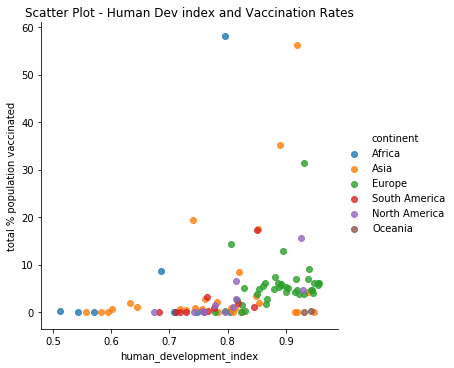

In [128]:
#Visualizations - scatterplot of human dev index and % of population vaccinated by continent
sns.lmplot(x="human_development_index", y="total % population vaccinated", hue="continent",data=df2, fit_reg=False);
plt.title("Scatter Plot - Human Dev index and Vaccination Rates")

In [77]:
#dataframe starting with first week of vaccine for each country
df3=df[-df['Vaccine Week'].isna()]

In [60]:
df3.head(10)

,continent,location,population,population_density,median_age,aged_65_older,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,life_expectancy,...,uai_x,ltowvs_x,ivr_x,Region,IncomeGroup,Case Week Max,% population vaccinated,% of population with covid,total % population vaccinated,total % of population with covid
48,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,0.000068,0.245326,0.000068,0.252888
49,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,0.000068,0.249283,0.000068,0.252888
50,Africa,Algeria,43851043.0,17.348,29.1,6.211,278.364,6.73,83.741,76.88,...,74.5,26.0,32.0,Middle East & North Africa,Lower middle income,51.0,0.000068,0.252888,0.000068,0.252888
100,Africa,Egypt,102334403.0,97.999,25.3,5.159,525.432,17.31,89.827,71.99,...,NaN,NaN,NaN,NaN,NaN,50.0,0.000000,0.160534,0.000000,0.160534
145,Africa,Mauritius,1271767.0,622.962,37.4,10.945,224.644,22.02,NaN,74.99,...,NaN,NaN,NaN,NaN,NaN,47.0,0.000000,0.044662,0.016277,0.046707
146,Africa,Mauritius,1271767.0,622.962,37.4,10.945,224.644,22.02,NaN,74.99,...,NaN,NaN,NaN,NaN,NaN,47.0,0.016277,0.045842,0.016277,0.046707
147,Africa,Mauritius,1271767.0,622.962,37.4,10.945,224.644,22.02,NaN,74.99,...,NaN,NaN,NaN,NaN,NaN,47.0,0.016277,0.046707,0.016277,0.046707
198,Africa,Morocco,36910558.0,80.080,29.6,6.769,419.146,7.14,NaN,76.68,...,68.0,14.0,25.0,Middle East & North Africa,Lower middle income,55.0,0.000000,1.271016,8.562534,1.307252
199,Africa,Morocco,36910558.0,80.080,29.6,6.769,419.146,7.14,NaN,76.68,...,68.0,14.0,25.0,Middle East & North Africa,Lower middle income,55.0,0.952906,1.283283,8.562534,1.307252
200,Africa,Morocco,36910558.0,80.080,29.6,6.769,419.146,7.14,NaN,76.68,...,68.0,14.0,25.0,Middle East & North Africa,Lower middle income,55.0,2.317272,1.292747,8.562534,1.307252


In [80]:
#high income data group
df3_income=df3[df3['IncomeGroup']=='High income']

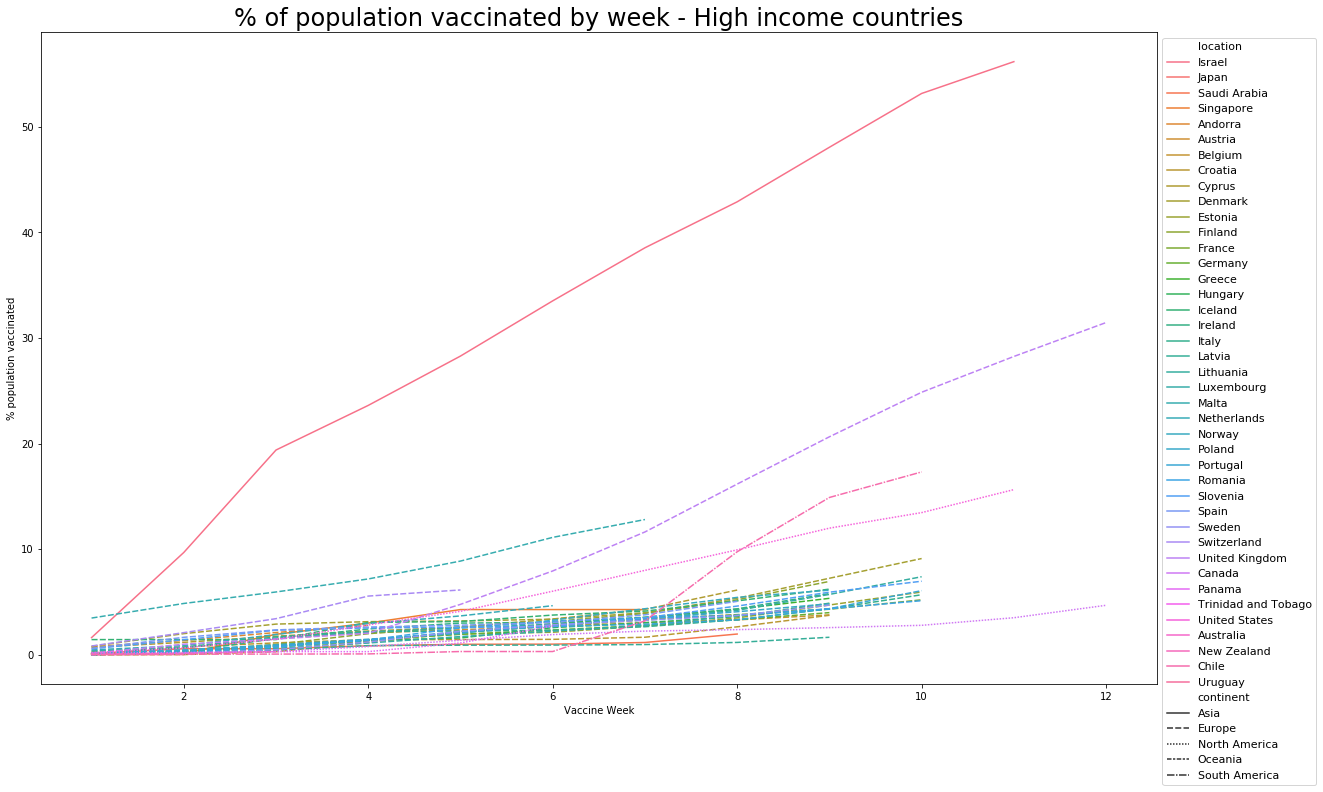

In [183]:
#plot of vaccination rates by week for each high income country
a4_dims = (20, 12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=df3_income, x="Vaccine Week", y="% population vaccinated",hue='location',style="continent")
plt.legend(fontsize=11, bbox_to_anchor=(1, 1), loc=2)
plt.title('% of population vaccinated by week - High income countries', size=24)

plt.savefig('plot1')


In [124]:
#dataframe with select list of countries
location_list = ['United States', 'United Kingdom', 'Italy', 'Spain', 'India', 'Brazil','France', 'Russia', 'Turkey', 'Germany']
df4_location=df3[df3['location'].isin(location_list)]


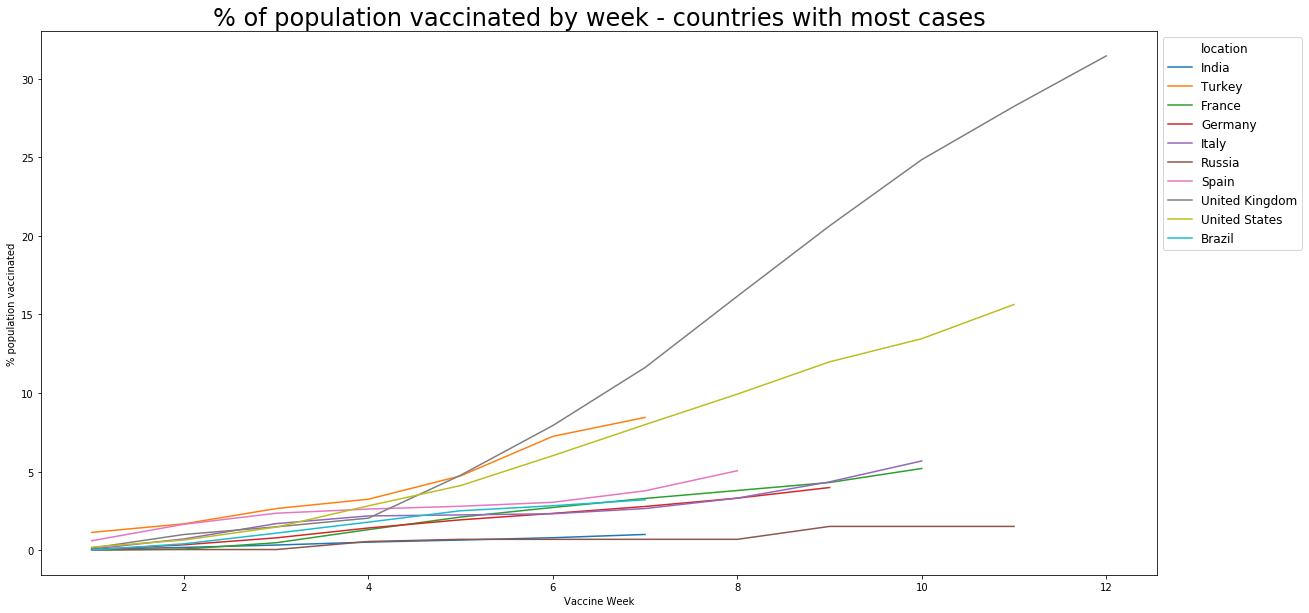

In [180]:
#plot of vaccination rates for the countries that were most impacted by covid.
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=df4_location, x="Vaccine Week", y="% population vaccinated", hue='location')
plt.legend(fontsize=12,bbox_to_anchor=(1, 1), loc=2)
plt.title('% of population vaccinated by week - countries with most cases', size=24)
plt.savefig('plot2')

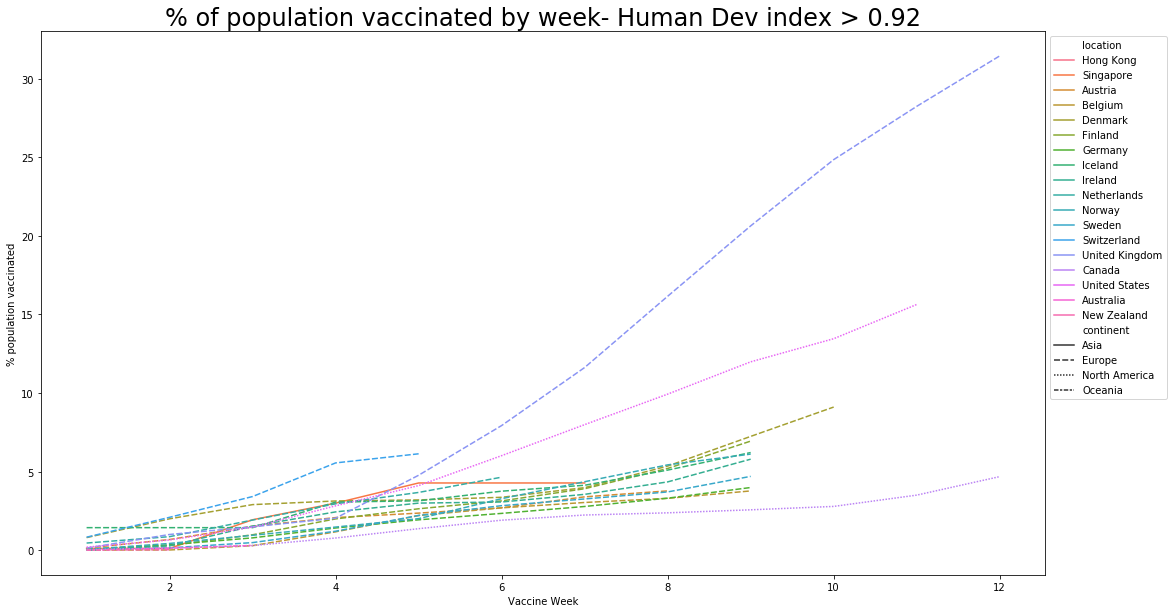

In [178]:
a4_dims = (18, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=df5_human_development_index, x="Vaccine Week", y="% population vaccinated",hue='location',style="continent")
plt.legend(fontsize=10,bbox_to_anchor=(1, 1), loc=2)
plt.title('% of population vaccinated by week- Human Dev index > 0.92', size=24)
plt.savefig('plot3')


In [197]:
## Unit testing
import unittest
class df_testcases(unittest.TestCase):
# test no negative values in data used for models
    def test_no_negatives (self):
        for x in df['% population vaccinated']:
            self.assertTrue (x>=0)
        for x in df['% of population with covid']:
            self.assertTrue (x>=0)
        for x in df['human_development_index']:
            self.assertTrue (x>=0)
        for x in df['idv_x']:
            self.assertTrue (x>=0)
        for x in df['uai_x']:
            self.assertTrue (x>=0)

# test % fields are less than 100
    def test_percentages (self):
        for x in df['% population vaccinated']:
            self.assertTrue (x<=100)
        for x in df['% of population with covid']:
            self.assertTrue (x<=100)
if __name__=='main':
    unittest.main()
    
